In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.plotly as py
from plotly.offline import plot, iplot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import plotly.tools as tls
init_notebook_mode(connected=True)

from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from mpl_finance import candlestick_ohlc
from pandas_datareader import data as pdr
import matplotlib.dates as mdates

In [2]:
# with pd.option_context("display.max_rows",10,"display.max_columns", 5):
#      print(pd.get_option("display.max_rows"))
#      print(pd.get_option("display.max_columns"))
# print(pd.get_option("display.max_rows"))
# print(pd.get_option("display.max_columns"))
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

# Problem 1:

In [3]:
women_nba = pd.read_csv('hw2_women_nba.csv')
print(women_nba.shape)
# print(women_nba.head())

(143, 32)


### a) Plot the desirable position in each team. Where desirability is measured by the percentage of free throws made.

In [4]:
teams_desirable_positions = women_nba.groupby('Team', as_index=False).agg({'FT%':'sum'}).sort_values(by='FT%', ascending=False)
teams_desirable_positions['Position'] = np.arange(1,len(teams_desirable_positions)+1)
teams_desirable_positions.reset_index(inplace=True, drop=True)
print(teams_desirable_positions)

   Team     FT%  Position
0   IND  1021.8         1
1   PHO   983.7         2
2   WAS   976.5         3
3   CON   968.8         4
4   SAN   898.1         5
5   CHI   896.0         6
6   MIN   895.7         7
7   SEA   890.9         8
8   DAL   879.6         9
9    NY   828.5        10
10   LA   828.4        11
11  ATL   739.7        12


In [5]:
trace1 = go.Bar(x = teams_desirable_positions['Team'], y=teams_desirable_positions['FT%'], name = "Number of games per team",
                     marker = dict(color="rgba(152,0,0,0.5)")
                    )

layout  = dict(title = "Desirable position in each team",
               xaxis = dict(title = "Teams",showgrid=False,showline=False,zeroline=False),
               yaxis = dict(title = "Mean percentage of free throws made",showgrid=False,showline=False,zeroline=False)
              )

data = [trace1]
figure = dict(data=data,layout=layout)
iplot(figure)

### b) For each team calculate the number of games played per player in that team. Plot the result.

In [6]:
games_number_per_team = women_nba.groupby('Team', as_index=False).agg({'Games Played':'sum'}).sort_values(by = 'Games Played', ascending=False)

In [7]:
trace1 = go.Bar(x = games_number_per_team['Team'], y=games_number_per_team['Games Played'], name = "Number of games",
                     marker = dict(color="rgba(152,0,0,0.5)")
                    )

layout  = dict(title = "Number of games played per Teams",
               xaxis = dict(title = "Teams",showgrid=False,showline=False,zeroline=False),
               yaxis = dict(title = "# of games",showgrid=False,showline=False,zeroline=False)
              )

data = [trace1]
figure = dict(data=data,layout=layout)
iplot(figure)

### c) For each team calculate the average experience. Plot the result using bar chart. The teams with the most and least experience should be highlighted by green and red colors respectively. The rest of the teams should have blue color.

In [8]:
women_nba.loc[women_nba['Experience'] == "R", ['Experience']] = 0

In [9]:
women_nba[["Experience"]] = women_nba[["Experience"]].astype('int64', copy=False)

In [10]:
avg_experience_per_team = women_nba.groupby('Team', as_index=False).agg({'Experience':'mean'})

In [11]:
min_val = avg_experience_per_team.Experience.min()
max_val = avg_experience_per_team.Experience.max()
mask1 = avg_experience_per_team.Experience == min_val
mask2 = avg_experience_per_team.Experience == max_val
mask3 = (avg_experience_per_team['Experience'] != min_val) & (avg_experience_per_team['Experience'] != max_val)

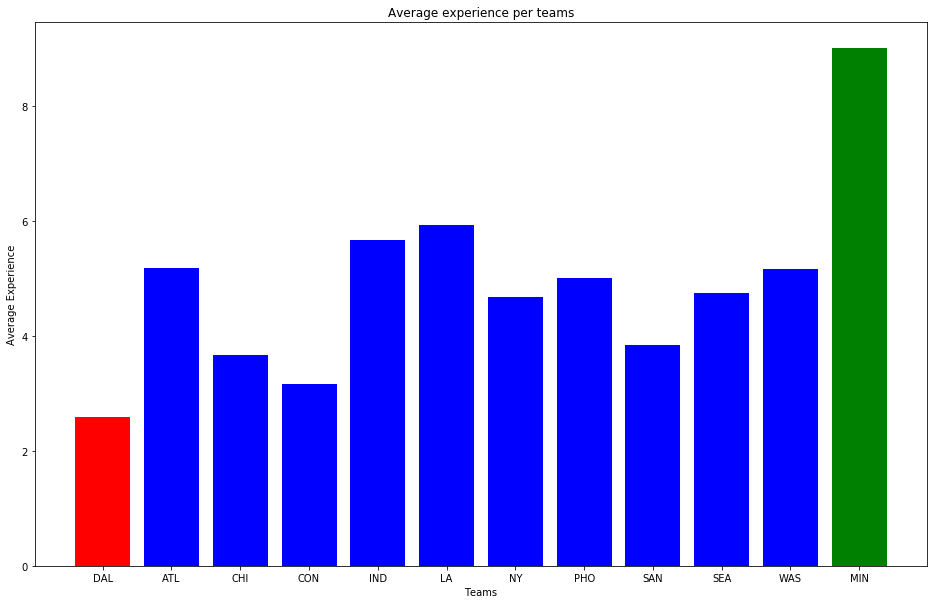

In [12]:
plt.figure(figsize=(16,10))
plt.bar(avg_experience_per_team[mask1].Team, avg_experience_per_team[mask1].Experience, color = 'red')
plt.bar(avg_experience_per_team[mask3].Team, avg_experience_per_team[mask3].Experience, color = 'blue')
plt.bar(avg_experience_per_team[mask2].Team, avg_experience_per_team[mask2].Experience, color = 'green')
plt.title('Average experience per teams')
plt.xlabel('Teams')
plt.ylabel('Average Experience')
plt.show()

### d) Plot each team’s average for free throw made and attempted as a stacked bar chart.

In [13]:
avg_throw_per_team = women_nba.groupby('Team', as_index=False).agg({'FTM':'mean', 'FTA':'mean'})

In [14]:
trace1 = go.Bar(x = avg_throw_per_team['Team'], y=avg_throw_per_team['FTM'], name = "made",
                     marker = dict(color="rgba(152,0,0,0.5)")
                    )
trace2 = go.Bar(x = avg_throw_per_team['Team'], y=avg_throw_per_team['FTA'], name = "attempted",
                     marker = dict(color="rgba(152,150,150,150)")
                    )

layout  = dict(title = "Average free throw made and attempted",
               xaxis = dict(title = "Teams",showgrid=False,showline=False,zeroline=False),
               yaxis = dict(title = "average free throw",showgrid=False,showline=False,zeroline=False),
               barmode = "stack"
              )

data = [trace1, trace2]
figure = dict(data=data,layout=layout)
iplot(figure)

### e) For each player calculate their efficiency calculated as https://en.wikipedia.org/wiki/Efficiency_(basketball). Plot the best 5 and the worst 5 players, sorted from the best to the worst. The 5 best players should be colored green and the worst 5 players colored red.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP

In [15]:
women_nba['EFF'] = (women_nba.PTS + 
        women_nba.REB + 
        women_nba.AST + 
        women_nba.STL + 
        women_nba.BLK -
        (women_nba.FGA - women_nba.FGM) -
        (women_nba.FTA - women_nba.FTM) -
        women_nba.TO) / women_nba['Games Played']

In [16]:
best_players = women_nba.sort_values(by = 'EFF', ascending=False).head(5)
worst_players = women_nba.sort_values(by = 'EFF', ascending=False).tail(5)

In [17]:
print('Best Players : ')
print(best_players[['Name', 'EFF']])
print('\n')
print('Worst Players : ')
print(worst_players[['Name', 'EFF']])

Best Players : 
                Name        EFF
131    Sylvia Fowles  27.206897
69     Jordan Hooper  24.482759
25   Brittney Griner  24.272727
103   Nneka Ogwumike  23.533333
19   Breanna Stewart  23.034483


Worst Players : 
                Name       EFF
90   Maimouna Diarra  0.666667
54    Essence Carson  0.533333
115   Sandrine Gruda  0.000000
18     Breanna Lewis  0.000000
91      Makayla Epps -0.428571


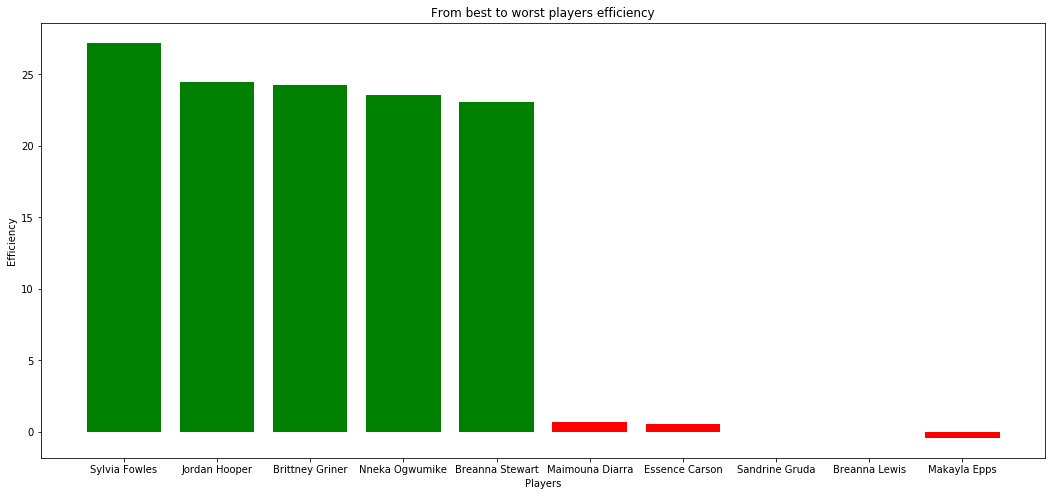

In [18]:
plt.figure(figsize=(18,8))
plt.bar(best_players.Name, best_players.EFF, color = 'green')
plt.bar(worst_players.Name, worst_players.EFF, color = 'red')
plt.title('From best to worst players efficiency')
plt.xlabel('Players')
plt.ylabel('Efficiency')
plt.show()

### f) Using the results from point e) calculate the average efficiency of team. Plot the result as bar chart. Sort the bars by the average age of the player per team from youngest to the oldest.

In [19]:
avg_efficiency_per_team = women_nba.groupby('Team', as_index=False).agg({'EFF':'mean', 'Age':'mean'})
avg_efficiency_per_team = avg_efficiency_per_team.sort_values(by='Age', ascending = True)

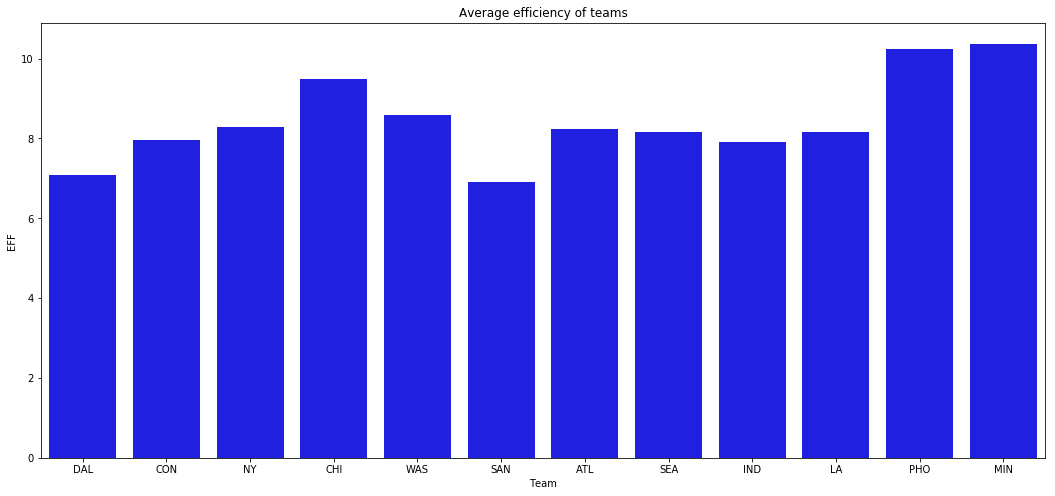

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(x=avg_efficiency_per_team['Team'], y=avg_efficiency_per_team['EFF'], color='b')
plt.title("Average efficiency of teams")
plt.show();

### g) For each player calculate the following statistic: number of years playing divided by their age. Create a scatterplot using the calculated statistic and efficiency calculated in point e).

In [21]:
women_nba['stat'] = women_nba.Experience / women_nba.Age

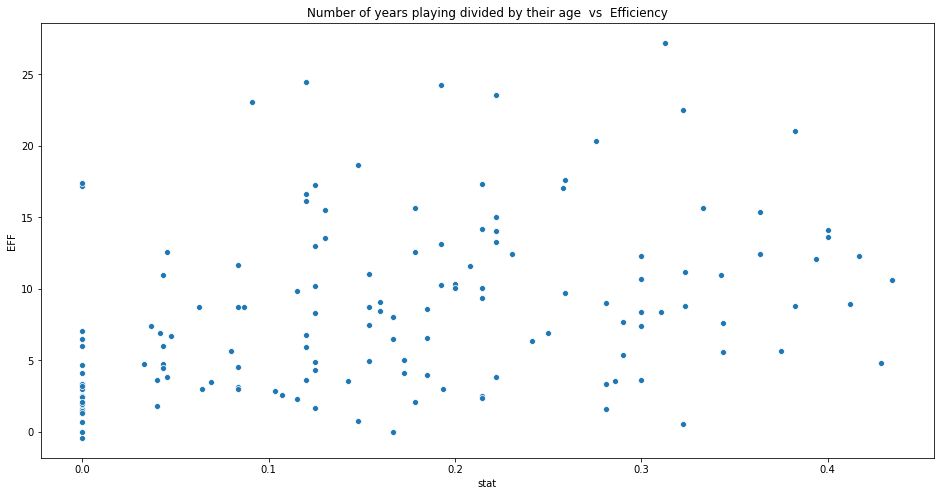

In [22]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="stat", y="EFF", data=women_nba)
plt.title("Number of years playing divided by their age  vs  Efficiency")
plt.show()

# Problem 2:
Chose a stock. Use pandas_datareader library to download daily stock
price data from yahoo finance for 1 month for your chosen stock. Create
Japanese Candlesticks plot using the data. Make sure that non trading days
(weekends and holidays) are not included in the plot, ie. if there is no data
for a given day, that day should not be included in the plot’s x axis.

In [23]:
start_date = '2015-07-01'
end_date = '2015-07-31'
df = pdr.DataReader('AAPL', 'yahoo', start_date, end_date)

In [24]:
cal = calendar()
holidays = cal.holidays(start=start_date, end=end_date)
df['IsHoliday'] = df.index.isin(holidays)
df = df[~df.IsHoliday]

In [25]:
op = df.Open
cl = df.Close
lo = df.Low
hi = df.High

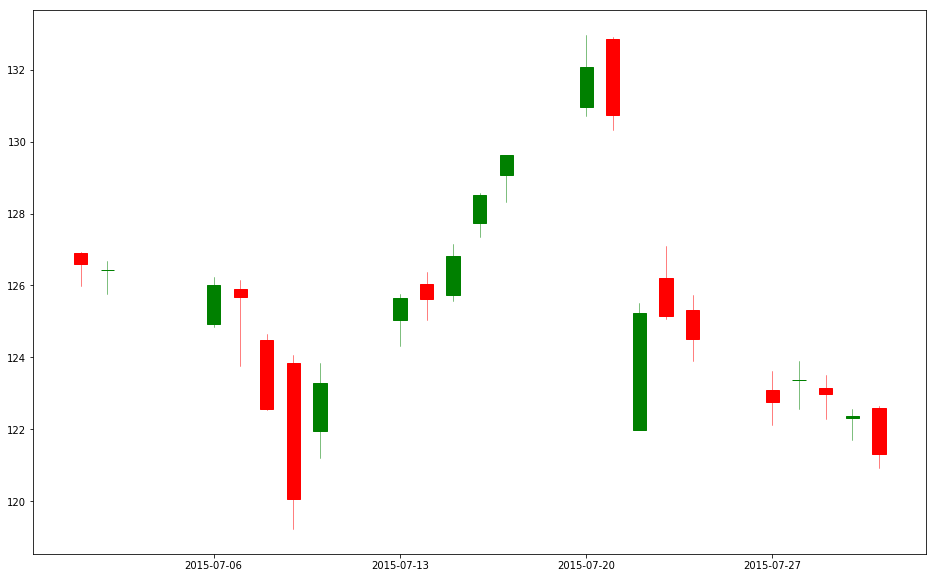

In [26]:
fig, ax = plt.subplots(figsize = (16, 10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
candlestick_ohlc(ax, 
                 zip(mdates.date2num(df.index.to_pydatetime()), op, hi, lo, cl),
                width = 0.5, colorup = "green");
ax.xaxis_date()

# Problem 3:
Chose two stocks different from each other and different from the one
chosen in problem 2. Using pandas_datareader library download daily stock
price data from yahoo finance for 1 year for the chosen stocks. Calculate the
daily return for each of the stocks.

In [27]:
start_date = '2015-01-01'
end_date = '2015-12-31'

In [28]:
ge = pdr.DataReader('GE', 'yahoo', start_date, end_date)
ibm = pdr.DataReader('IBM', 'yahoo', start_date, end_date)

In [29]:
ge['Daily_Return'] = ge['Adj Close'][:-1].values / ge['Adj Close'][1:] - 1
ibm['Daily_Return'] = ibm['Adj Close'][:-1].values / ibm['Adj Close'][1:] - 1

### a) Plot the daily return for the 2 stocks in one plot

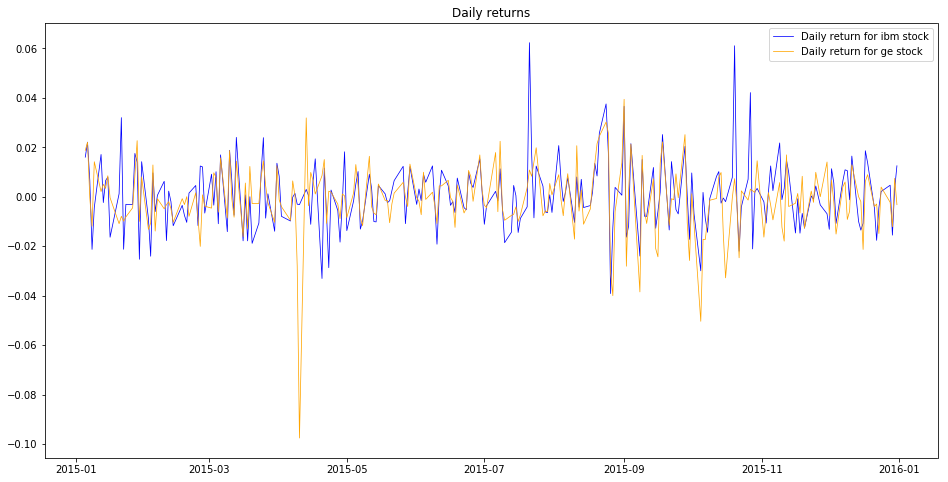

In [30]:
plt.figure(figsize=(16,8))
line_width = 0.75
plt.plot(ibm.Daily_Return, c='blue', lw=line_width, label='Daily return for ibm stock')
plt.plot(ge.Daily_Return, c='orange', lw=line_width, label='Daily return for ge stock')
plt.legend()
plt.title('Daily returns')
plt.show();

### b) Plot the daily return for the 2 stocks in 2 plots (subplots)

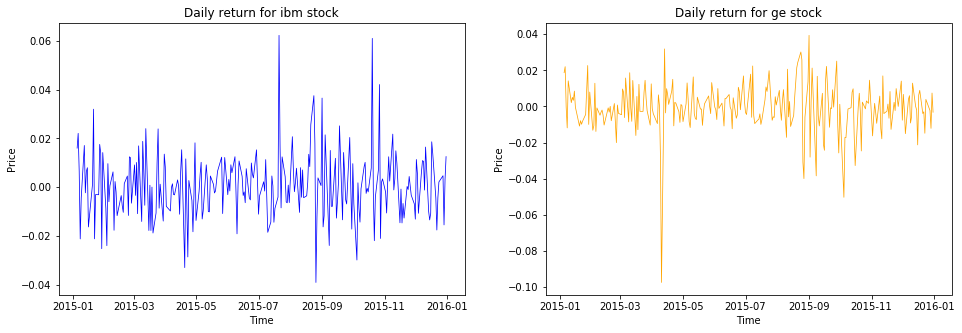

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5));

line_width = 0.75

ax11 = axes[0]
ax12 = axes[1]

ax11.plot(ibm.Daily_Return, c='blue', lw=line_width)
ax12.plot(ge.Daily_Return, c='orange', lw=line_width)

ax11.set_title('Daily return for ibm stock')
ax12.set_title('Daily return for ge stock')

ax12.set_xlabel('Time')
ax12.set_ylabel('Price')
ax11.set_xlabel('Time')
ax11.set_ylabel('Price');

### Assume you have bought 300 USD worth of stock 1 and 700 USD worth of stock 2, and sold your holdings one year later. Calculate the value of your holdings (in USD) for each stock over time. (For example the day you bought the stocks your holding for stock 1 was 300, and the value for stock 2 was 700. Assume the price of stock 1 went up by 5% and the price of stock 2 went down by 10%, then your holding for stock 1 will be 315, and the holding for stock 2 will be 670.)
https://drive.google.com/drive/folders/1x7lylf5NkTRRGrSWfiK3fMAJ6jjW-vJV

In [32]:
ibm['Holding'] = 300
ge['Holding'] = 700

In [33]:
for i in range(1, ibm.shape[0]):
    ibm.iloc[i, 7:8] = ibm.iloc[i-1, 7:8].values[0] + ibm.iloc[i, 6:7].values[0] * ibm.iloc[i-1, 7:8].values[0]
for i in range(1, ge.shape[0]):
    ge.iloc[i, 7:8] = ge.iloc[i-1, 7:8].values[0] + ge.iloc[i, 6:7].values[0] * ge.iloc[i-1, 7:8].values[0]

### c) Plot the value of your holdings over time in 2 plots (subplots) as area chart.

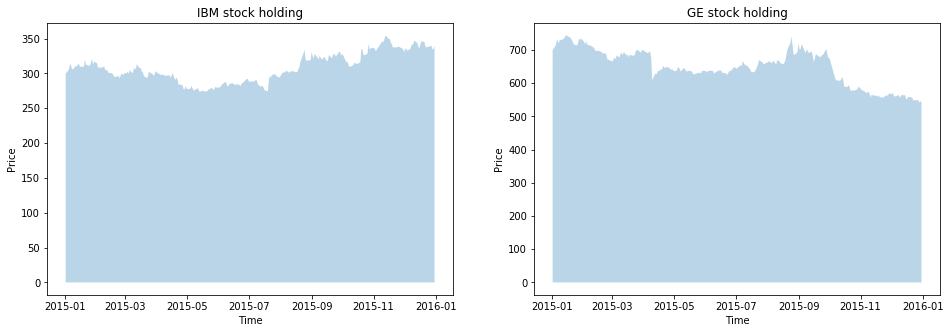

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5));

line_width = 0.75

ax11 = axes[0]
ax12 = axes[1]

ax11.plot(x = ibm.index, y = ibm.Holding, c='blue', lw=line_width)
ax12.plot(x = ge.index, y = ge.Holding, c='orange', lw=line_width)

ax11.fill_between(ibm.index, 0 ,ibm.Holding , alpha=.3)
ax12.fill_between(ge.index, 0 ,ge.Holding , alpha=.3)

ax11.set_title('IBM stock holding')
ax12.set_title('GE stock holding')

ax12.set_xlabel('Time')
ax12.set_ylabel('Price')
ax11.set_xlabel('Time')
ax11.set_ylabel('Price');

### d) Plot the value of your holdings over time in 1 plot as stacked area chart.

In [35]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ibm.Holding, label='ibm')
ax.plot(ge.Holding, label='ge')

update = {'data':[{'fill': 'tonexty'}]}

plotly_fig = tls.mpl_to_plotly( fig )
plotly_fig.update(update)
iplot(plotly_fig);

### e) Calculate what percentage of your total holding each stock represented over time. For example the day you bought the stocks your total holding was 300 + 700 = 1000 USD, Stock 1 represented 30% of your total holding (100 * 300/1000), and stock 2 represented 70% of your total holding (100 * 70/1000). Plot the result as percentage stacked area chart.

In [36]:
ge['Holding_ibm'] = ibm.Holding
ge['Holding_all'] = ge.Holding + ge.Holding_ibm

ge['Holding_ge_percentage'] = ge.Holding/ge.Holding_all * 100
ge['Holding_ibm_percentage'] = ge.Holding_ibm/ge.Holding_all * 100

In [37]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ge.Holding_ge_percentage, label='ge')
ax.plot(ge.Holding_ibm_percentage, label='ibm')

update = {'data':[{'fill': 'tonexty'}]}

plotly_fig = tls.mpl_to_plotly( fig )
plotly_fig.update(update)
iplot(plotly_fig);

# Problem 4:
The data in hw2_worldbank_gdp.csv file is yearly GPD in USD for each
country. The data spans from 1960 to 2017. The data is downloaded from
https://data.worldbank.org. Take data for years 2009 and 2010. Keep only the
countries that have no missing data, discard the rest. Calculate the GPD
percentage change for each country from 2009 to 2010. Using the GDP
percentage change create a Choropleth map. The color map should be
centered at 0 (white), all positive numbers should have a shade of red (the
higher the absolute value the more should the color intensity be), and all
negative numbers should have a shade of blue (the higher the absolute value
the more should the color intensity be)

In [38]:
worldbank_gdp = pd.read_csv('hw2_worldbank_gdp.csv')

In [39]:
worldbank_gdp = worldbank_gdp[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2009', '2010']]

In [40]:
worldbank_gdp = worldbank_gdp.dropna()

In [41]:
np.where(worldbank_gdp.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [42]:
worldbank_gdp.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2009              0
2010              0
dtype: int64

In [43]:
worldbank_gdp['gdp_percentage'] = (worldbank_gdp['2010'] - worldbank_gdp['2009'])/worldbank_gdp['2009'] * 100

In [44]:
worldbank_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,gdp_percentage
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2.498883e+09,2.390503e+09,-4.337134
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1.243909e+10,1.585657e+10,27.473782
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,7.030716e+10,8.379950e+10,19.190552
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.204421e+10,1.192696e+10,-0.973504
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,3.660531e+09,3.355695e+09,-8.327627


In [45]:
mycolorscale = [
        [0, "blue"],
        [(sum(worldbank_gdp["gdp_percentage"] < 0) / worldbank_gdp.shape[0]), "white"],
        [1, "red"]
    ]

In [46]:
data = [go.Choropleth(
    locations = worldbank_gdp['Country Code'],
    z = worldbank_gdp['gdp_percentage'].astype(float),
    autocolorscale = False,
    colorscale = mycolorscale,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '%',
        title = 'GDP<br>growth percentage'),
)]

layout = go.Layout(
    geo = go.layout.Geo(
#         showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)